## Jorge Bueno Perez - 419034

## Prediction of the average price of the Spanish rail tickets data 

In [2]:
import numpy as np
import pandas as pd
import os
import time
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
import joblib

In [4]:
renfe = pd.read_csv("~/Desktop/Projects/DL/Regression/Before_modeling/Datasets/renfe2.csv")

In [23]:
X = renfe.drop(["price"],1).astype(int) #Feature Matrix
y = renfe["price"] #Target Variable

In [6]:
X_train = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/X_train.csv")
X_test = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/X_test.csv")
y_train = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/y_train.csv")
y_test = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/y_test.csv")

# 1) `Model with Cross Validation` - `Bagging`

In [5]:
model = BaggingRegressor(n_estimators=500, random_state=123)

In [33]:
model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

## 1.1) `Training` model

### This model is going to be `tuned` with different `base estimators`:
- `Linear regression`
- `Decision tree regressor`: The same `max_depth` parameter will be used as per the one selected before
- `K nearest neighbors`:  `n_neighbors` equal to `5`

In [6]:
params = {'base_estimator': [None, LinearRegression(), DecisionTreeRegressor(max_depth=14), KNeighborsRegressor(n_neighbors= 5)]}

bagging_regressor_grid = GridSearchCV(model, param_grid =params, cv=3, n_jobs=-1)
bagging_regressor_grid.fit(X_train, y_train)

print('Best Parameters : ',bagging_regressor_grid.best_params_)

/Users/Lajobu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Parameters :  {'base_estimator': DecisionTreeRegressor(max_depth=14)}


### It seems the `decision tree regressor` was selected

In [7]:
joblib.dump(bagging_regressor_grid, "bagging_regressor_grid.sav")

['bagging_regressor_grid.sav']

## 1.2) `Prediction on the test sample`

In [7]:
bagging_regressor_grid = joblib.load("bagging_regressor_grid.sav")

In [27]:
y_pred = bagging_regressor_grid.predict(X_test)

In [28]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 6.460113463603041


In [29]:
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 11.302818532441677


In [30]:
print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.8486368925664937


## 1.3) `Prediction on the train sample`

In [34]:
y_pred_ = bagging_regressor_grid.predict(X_train)

In [35]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_train, y_pred_))

Mean Absolute Error 6.08183064398524


In [36]:
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_)))

Root Mean Squared Error 10.70241026496746


In [37]:
print('R Squared Score is:', r2_score(y_train, y_pred_))

R Squared Score is: 0.8658482070620439


## 1.4) `Graphical results`

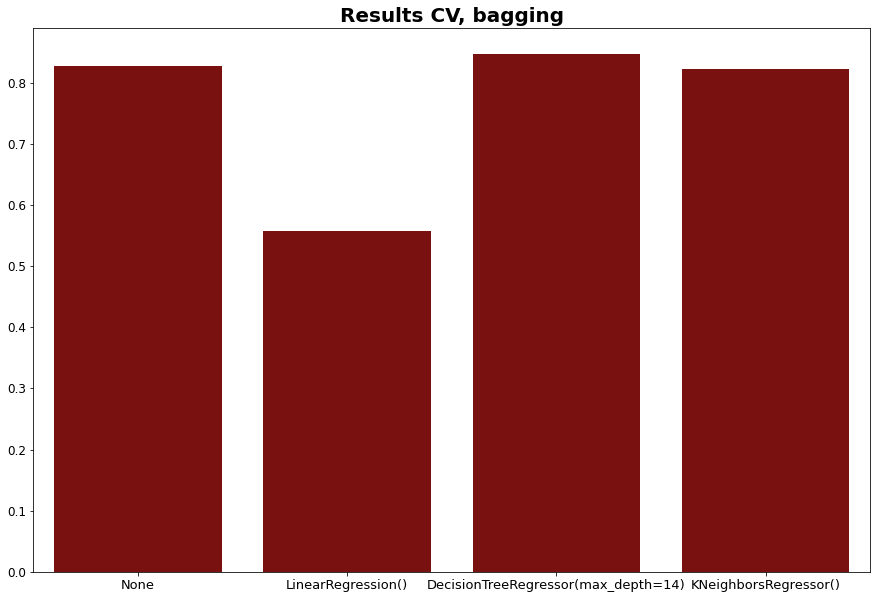

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plot = sns.barplot(x=bagging_regressor_grid.cv_results_['param_base_estimator'].astype(str).tolist(), y=bagging_regressor_grid.cv_results_['mean_test_score'].tolist(),
            label="Total", color= "darkred")
plot.set_title("Results CV, bagging", fontsize=20, fontweight="bold")
plot.tick_params(axis='x', labelsize=13)
plot.tick_params(axis='y', labelsize=12)
fig.savefig('Figures/cv_bagging.png')

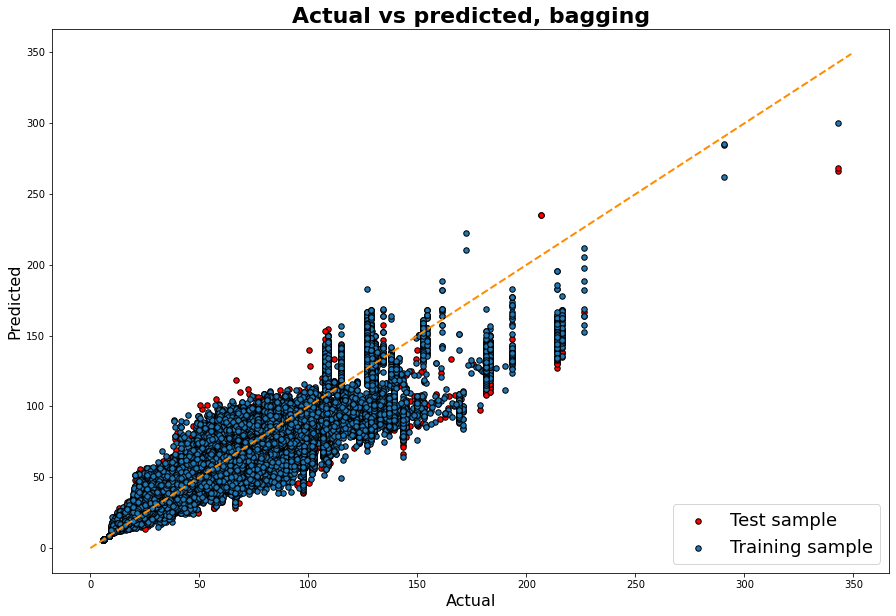

In [98]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(figsize=(15,10))

plt.title('Actual vs predicted, bagging', fontsize=22,
            fontweight='bold')

ax1.scatter(y_test, y_pred, edgecolors=(0, 0, 0), color= "red", s=30, label='Test sample')
ax1.plot(range(350), 'k--', lw=2, color= "darkorange")
ax1.set_xlabel('Actual', fontsize=16)
ax1.set_ylabel('Predicted', fontsize=16)

ax1.scatter(y_train, y_pred_, edgecolors=(0, 0, 0), s=30,label='Training sample')

ax1.legend(loc=4, fontsize=18)
plt.show() 
fig.savefig('Figures/cv_pred_err_bagging.png')

# 2) `Conclusions`

### The best base estimator is `decision tree regressor` with `max_depth` equal to `14`
### It seems there is `not a lot of difference` between the `R squared score` of the `test` and `training` samples
### In order to compare the models  `R squared score of the test sample` will be taken, which is equal to `84.86%`